In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from category_encoders import TargetEncoder

In [4]:


!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.5 MB/s eta 0:00:00


In [8]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('/content/advertising.csv')

# Display first few rows
data.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Wrightburgh,Female,Tunisia,0
1,NaN,31.0,68441.85,193.77,West Jodi,Male,Nauru,0
2,69.47,26.0,59785.94,236.50,Davidton,Female,San Marino,0
3,74.15,29.0,54806.18,245.89,West Terrifurt,Male,Italy,0
4,68.37,35.0,73889.99,225.58,South Manuel,Female,Iceland,0


In [9]:

X = data.drop("Clicked on Ad", axis=1)
y = data["Clicked on Ad"]
#Visualize Data Before Preprocessing
categorical_cols = X.select_dtypes(include=['object']).columns  # City, Gender, Country
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns  # Daily Time Spent, Age, etc.

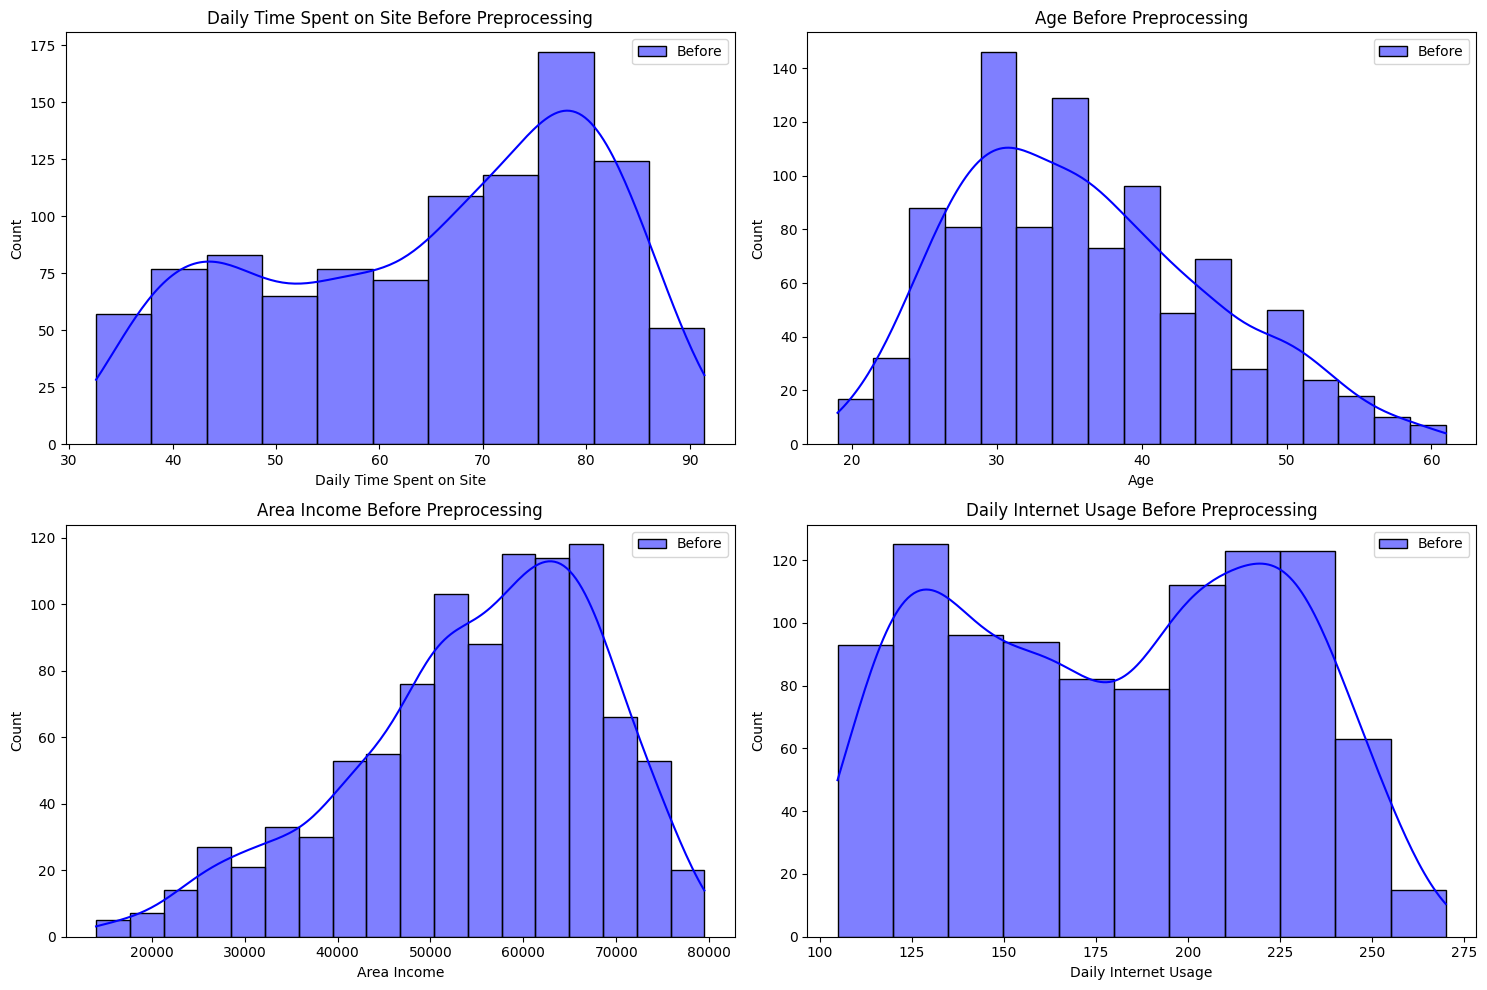

In [10]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X[col], kde=True, color='blue', label='Before')
    plt.title(f'{col} Before Preprocessing')
    plt.legend()
plt.tight_layout()
plt.show()

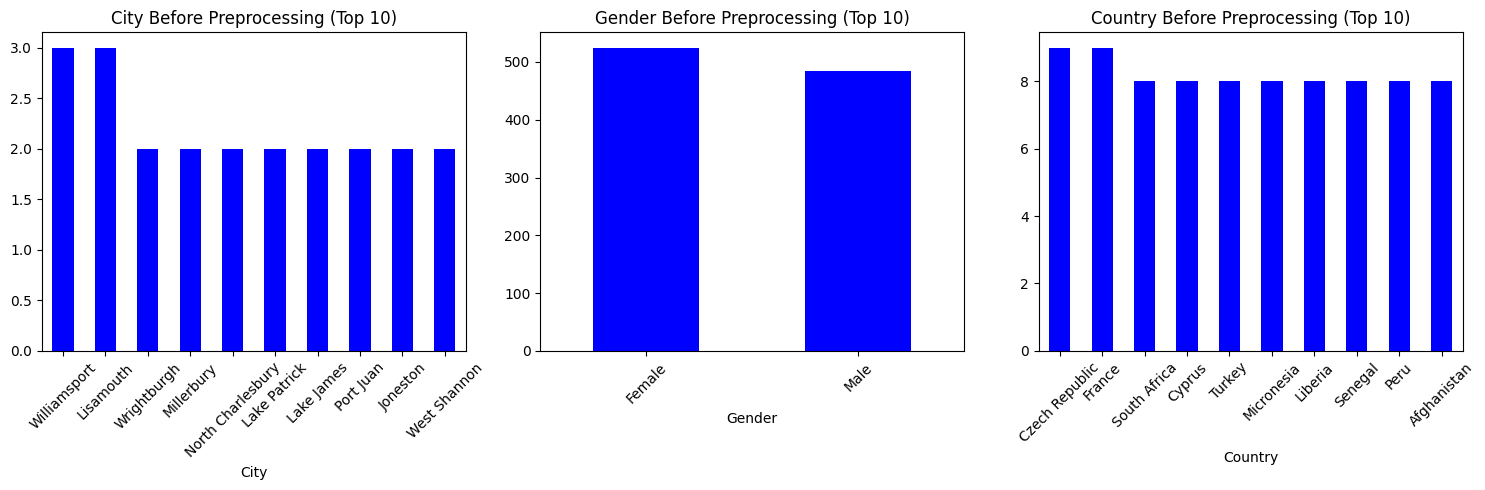

In [11]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    X[col].value_counts().nlargest(10).plot(kind='bar', color='blue')
    plt.title(f'{col} Before Preprocessing (Top 10)')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
print("\nStarting Preprocessing...")

# Preprocessing for categorical data: Impute with 'missing' and apply TargetEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('target_encoder', TargetEncoder())
])

# Preprocessing for numerical data: Impute with mean and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])


Starting Preprocessing...


Visualizing Data After Preprocessing...


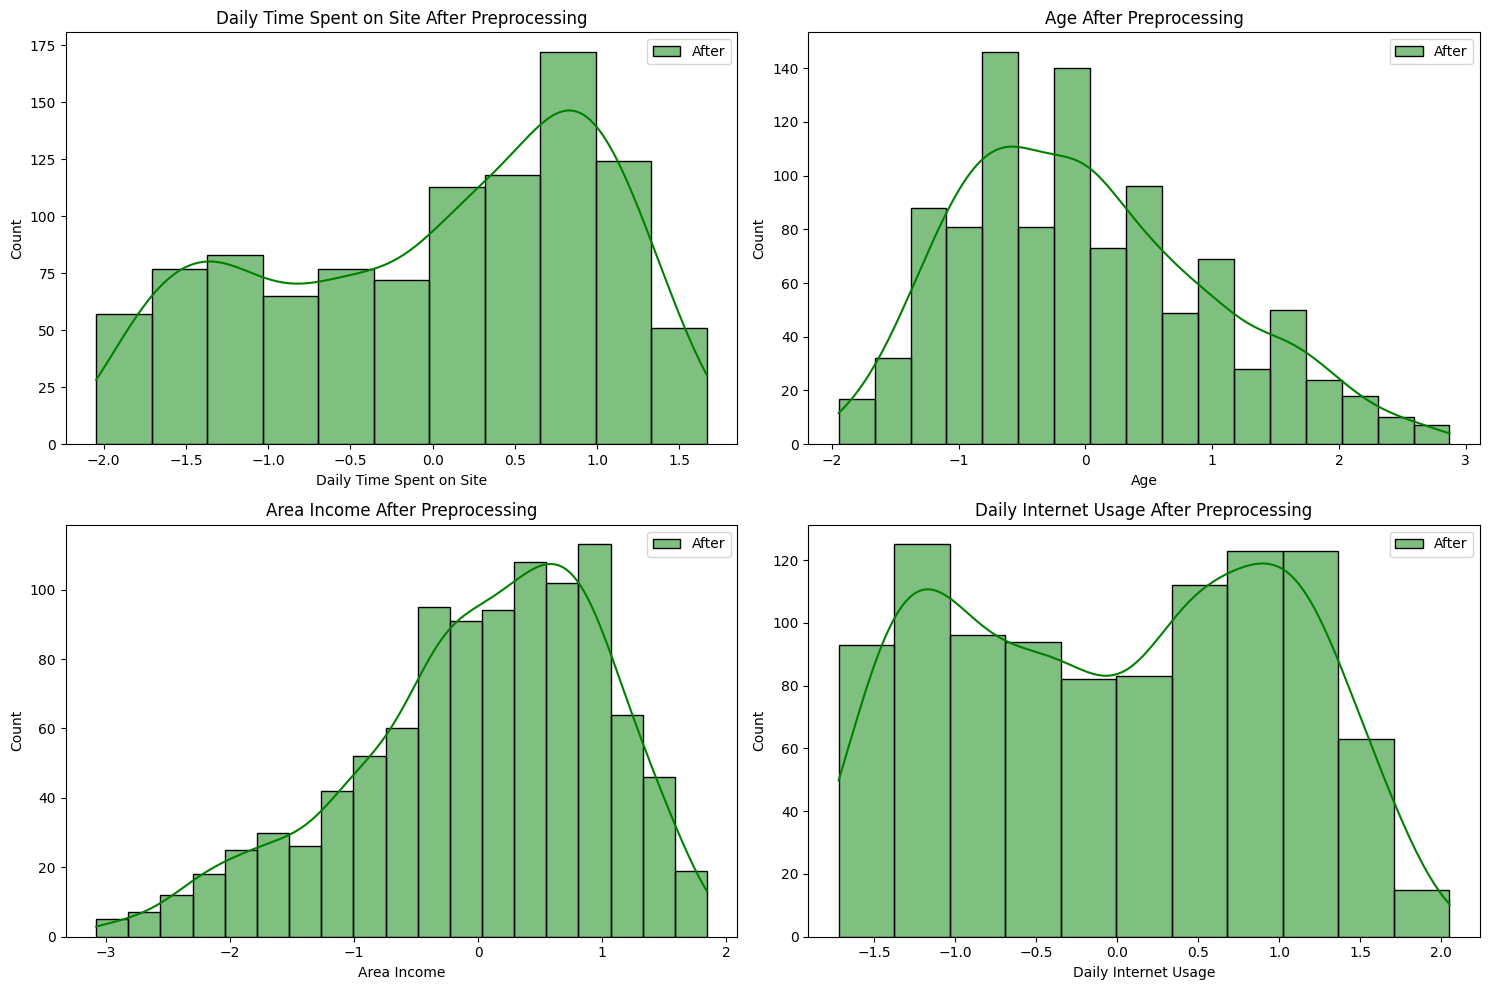

In [13]:
X_processed = preprocessor.fit_transform(X, y)

# Corrected feature names: Use original categorical column names directly
feature_names = list(categorical_cols) + list(numerical_cols)
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

# Step 5: Visualize Data After Preprocessing
print("Visualizing Data After Preprocessing...")

# Numerical Features - Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X_processed_df[col], kde=True, color='green', label='After')
    plt.title(f'{col} After Preprocessing')
    plt.legend()
plt.tight_layout()
plt.show()

In [14]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

# Step 4: Create full pipeline with Gaussian Naive Bayes
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model
print("\nTraining Gaussian Naive Bayes Model...")
pipeline.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = pipeline.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Did Not Click', 'Clicked']))

# Step 9: Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print("[[True Did Not Click, False Clicked]")
print(" [False Did Not Click, True Clicked]]")
print(cm)


Training Gaussian Naive Bayes Model...

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

Did Not Click       0.96      0.94      0.95        96
      Clicked       0.94      0.96      0.95       106

     accuracy                           0.95       202
    macro avg       0.95      0.95      0.95       202
 weighted avg       0.95      0.95      0.95       202


Confusion Matrix:
[[True Did Not Click, False Clicked]
 [False Did Not Click, True Clicked]]
[[ 90   6]
 [  4 102]]
